In [2]:
from EdgeFinderV4 import BoundaryDetector as BD
from EdgeFinderV2 import EdgeFinder as ef
from PIL import Image
from ImageFrame import Frame
import numpy as np
import matplotlib.pyplot as plt
import timeit
from controll_angle_functions import get_angle

load CVS file successfully


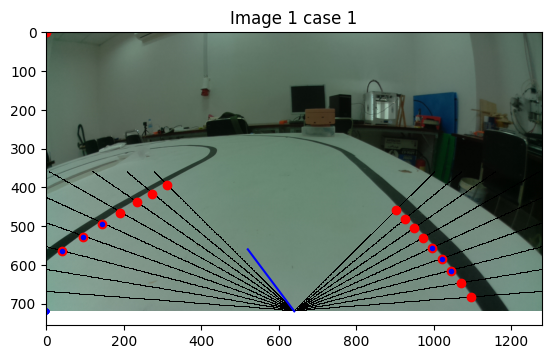

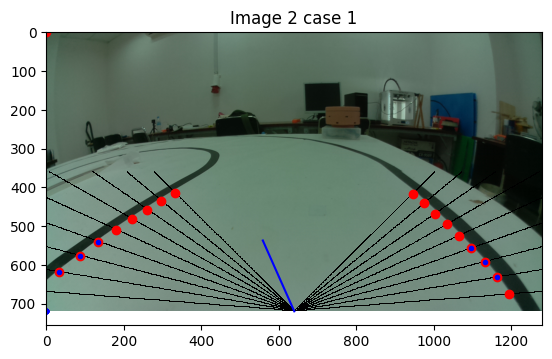

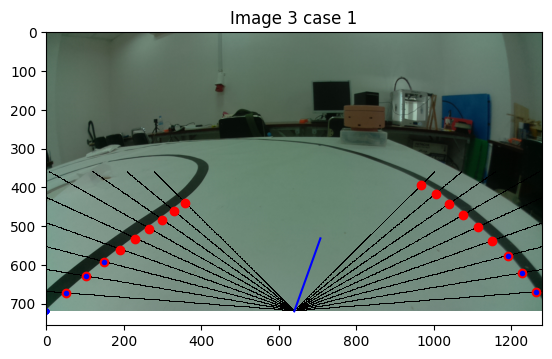

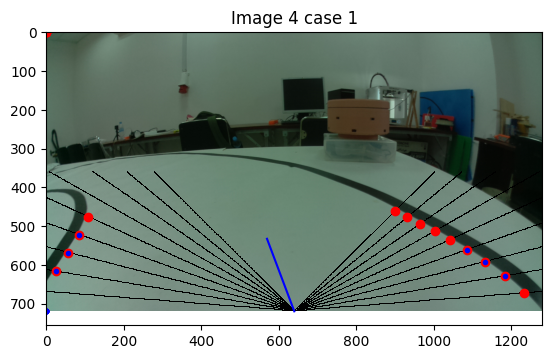

In [3]:
#creating frame and importing image
frame1 = Frame(1280,720,5)
for n in range(1,5,1):
    
    img = np.array(Image.open("TestingImage/Image"+str(n)+".jpg"))
    #applying the masks to the image
    kernal = np.array([-1,-1,-1,0,1,1,1])
    #Using EdgeDetection
    BP = BD(img,kernal,frame1,0,60)
    P = BP.boundary
    A = get_angle(P)   
    if True: 
        BP.ploting_onImage(img,str(n)+' case '+str(A[0]))
        #BP.ploting_onGraph()
        plt.plot(A[2][:,0], 720-A[2][:,1], 'b.')
        plt.plot([1280/2,1280/2+200*np.sin(np.deg2rad(A[1][0]))],[720-0.0,720-200*np.cos(np.deg2rad(A[1][0]))],'b-')
        plt.show()


In [ ]:
plt.axis((0,1280,0,720))
plt.plot(A[2][:,0], A[2][:,1], 'ko')
plt.plot([1280/2,1280/2+100*np.sin(np.deg2rad(A[1][0]))],[0.0,100*np.cos(np.deg2rad(A[1][0]))],'k-')

In [ ]:
frame1 = Frame(1280,720,10)

len(frame1.fline)
plt.axis([0,1280,720,0])
print(frame1.fline['1'])
for key in frame1.fline.keys():
    plt.plot(frame1.fline[key][:,0],frame1.fline[key][:,1],'k,')
plt.show

In [ ]:
get_angle(P)

In [ ]:
for i,n in enumerate(P[::2]):
    print(f'i {i} n{n}')

In [ ]:
a = P[::2]
print(f'original {a}')
a[:3,1]=720 - a[:3,1]
print(f'new {a}')
print(f'P {P}')

In [ ]:
a = np.zeros((int(1280/2),2))
ll = np.array([[int(1280/2)-1,720-1]])  #init the first point of the left line ex same as above
a[0] = [int(1280/2)-1,720-1]

In [ ]:
a = np.array([[1,2],[0,0],[1,1],[1,1]])
right = a[::2]
left = a[::2][~np.all(a[::2]==0,axis=1)]

In [ ]:
left

In [2]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import torch
import torch.nn as nn
from torch.nn.modules.loss import _Loss
from torch.autograd import Variable
import cv2

In [3]:
class LaneDataset(torch.utils.data.Dataset):
    def __init__(self, dataset_path="/kaggle/input/tusimple/TUSimple/train_set", train=True, size=(512, 256)):
        self._dataset_path = dataset_path
        self._mode = "train" if train else "eval"
        self._image_size = size # w, h

        if self._mode == "train":
            label_files = [
                os.path.join(self._dataset_path, f"label_data_{suffix}.json")
                for suffix in ("0313", "0531")
            ]
        elif self._mode == "eval":
            label_files = [
                os.path.join(self._dataset_path, f"label_data_{suffix}.json")
                for suffix in ("0601",)
            ]

        self._data = []

        for label_file in label_files:
            self._process_label_file(label_file)

    def __getitem__(self, idx):
        image_path = os.path.join(self._dataset_path, self._data[idx][0])
        image = cv2.imread(image_path)
        h, w, c = image.shape
        image = cv2.resize(image, self._image_size, interpolation=cv2.INTER_LINEAR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image[..., None]
        lanes = self._data[idx][1]

        segmentation_image = self._draw(h, w, lanes, "segmentation")
        instance_image = self._draw(h, w, lanes, "instance")

        instance_image = instance_image[..., None]

        image = torch.from_numpy(image).float().permute((2, 0, 1))
        segmentation_image = torch.from_numpy(segmentation_image.copy())
        instance_image =  torch.from_numpy(instance_image.copy()).permute((2, 0, 1))
        segmentation_image = segmentation_image.to(torch.int64)

        return image, segmentation_image, instance_image # 1 x H x W [[0, 1], [2, 0]]
    
    def __len__(self):
        return len(self._data)

    def _draw(self, h, w, lanes, image_type):
        image = np.zeros((h, w), dtype=np.uint8)
        for i, lane in enumerate(lanes):
            color = 1 if image_type == "segmentation" else i + 1
            cv2.polylines(image, [lane], False, color, 10)

        image = cv2.resize(image, self._image_size, interpolation=cv2.INTER_NEAREST)

        return image

    def _process_label_file(self, file_path):
        with open(file_path) as f:
            for line in f:
                info = json.loads(line)
                image = info["raw_file"]
                lanes = info["lanes"]
                h_samples = info["h_samples"]
                lanes_coords = []
                for lane in lanes:
                    x = np.array([lane]).T
                    y = np.array([h_samples]).T
                    xy = np.hstack((x, y))
                    idx = np.where(xy[:, 0] > 0)
                    lane_coords = xy[idx]
                    lanes_coords.append(lane_coords)
                self._data.append((image, lanes_coords))

In [4]:
data = LaneDataset()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/tusimple/TUSimple/train_set\\label_data_0313.json'